<h1><center>Równanie Lotki-Volterry do opisu zależności w ekosystemie. Model drapieżnik-ofiara</center></h1>

# Spis treści:
### 1. [Wstęp](#1)
### 2. [Model - część teoretyczna](#2)
   * ##### [Historia modelu](#2_1)
   * ##### [Opis modelu](#2_2)
   * ##### [Próba rozwiązania](#2_3)
### 3. [Model w Pythonie - część praktyczna](#3)
   * ##### [Rozwiązanie numeryczne za pomocą metody Eulera](#3_1)
### 4. [Modyfikacje modelu podstawowego](#4)
### 5. [Analiza symulacji](#5)
### 6. [Wyniki i wnioski](#6)
### 7. [Zakończenie](#7)



# Wstęp <a id="1"></a>

#### ... bo czym byłaby udana podróż bez punktu startowego

##### Witamy w naszej podróży po *groźnie brzmiącym* świecie modelu drapieżnik-ofiara, czyli Lotki-Volterry. Postaramy się jednak, aby była ona raczej poszczerzeniem horyzontów, aniżeli drogą przez mękę. Zacznijmy od określenia punktu A wejścia i B wyjścia - motywacji i celów: 

### Motywacja:

* czlowiek jako istota pełna antagonizmów poprzez poznanie skrajności może dojść do fundamentalnych konkluzji, a przez kulturę przewija się od zawsze motyw walki dobra ze złem, dlatego uznaliśmy, że jest to temat warty zgłębienia,

* na 1 roku na projekcie z Pakietów matematycznych braliśmy pod lupę model rozwoju agresji w społeczeństwie z elementami teorii gier, dlatego uznaliśmy, że warto pociągnąć ten informatyczny temat w kontekście matematycznym,

* w globalnym kontekście uważamy, że jest to realny problem który można przestudiować, co może podnieść naszą świadomość w sprawie utrzymania niektórych ekosystemów.

### Cele:
* zapoznanie się z modelem Lotki-Volterry i implementacja w wraunkach programistycznych, 

* „udziwnienie” modelu (poprzez jego „unormalnienie”), czyli wprowadzenie dodatkowych zmiennych upodabniających model do świata realnego,

* przeprowadzenie symulacji oraz ich analiza,

* wyciągnięcie wniosków oraz porównanie wyników z wynikami symulacji rozwoju agresji z wyżej wspomniangeo projektu,

* zadanie dodatkowych pytań i próba odpowiedzi na nie (np. co byłoby kluczowe, aby taka symulacja odzwierciedlała w pełni rzeczywistość, co by nam dał eksperyment, tutaj jeszcze jedno krótkie pytanie itp.)

##### Mapę po naszym projekcie można znaleźć na samej górze. A skoro już wiemy skąd wychodzimy i dokąd zmierzamy, to jako że droga jest w każdej podróży najważniejsza, właśnie do niej przejdźmy.


***

# Model - część teoretyczna <a id="2"></a>

#### ...czyli o dwóch takich, co wpadli na to samo

### Historia modelu <a id="2_1"></a>

Zależności na linii drapieżnik-ofiara obserwuje się w przyrodzie od zawsze. Jest to konsekwencją przyjmowania różnych strategii na drodze do osiągnięcia zamierzonego celu. W interakcjach między orgzanizmami w ekosystemie tym celem jest najczęściej przeżycie. Takie zależności występowały między jednokomórkowcami, występowały między dinozaurami, występują do dnia dzisiejszego w świecie roślin i zwierząt. Tak głęboko zakorzeniony problem musiał być w końcu wzięty pod lupę. I został. Na początku XX wieku.

W 1910 roku amerykański matematyk Alfred James Lotka publikuje teorię o autokatalitycznych reakcjach chemicznych. Sam Lotka, pasjonat chemii fizycznej, chce przenieść swoją wiedzę na obszar biologii i rozwinąć dziedzinę biologii fizycznej, gdyż obiema sferami rządzą analogiczne podstawowe prawa. Jego praca zostaje zauważona w latach 20., a matematykowi zostają umożliwione dalsze badania. W tych z 1925 roku dochodzi do modelu, w którym interakcja w środowisku między drapieżnikiem a ofiarą przyjmuje postać nietłumionej, ciągłęj oscylacji dwóch skrajnych gatunków.

W tym samym roku włoski matematyk Vito Volterra, niezależnie od Alfreda Lotki, podejmuje się analizy problemu rybaków na Morzu Adriatyckim. Wyławianych jest więcej ryb drapieżnych w okresie po 1. wojnie światowej, choć pozornie wszystkie populacje ryb powinny ucierpieć w wyniku konfliktu. Jak wyjasniał później Volterra, było to spowodowane zaprzestaniem połowu w tym okresie, a w takim wypadku populacja drapieżników wróciła do „normy". W 1926 roku opublikował pracę opierającą się na modelu populacyjnym, z podobną oscylacją opisaną przez Lotkę. 

Równania opisujące interakcje drapieżnik-ofiara zostały w późniejszym czasie nazwane **Modelem Lotki-Volterrego**, który stanowi podstawę dalszych badań w zakresie ekologii matematycznych populacji (*mathematical population ecology*) i jest kamieniem milowym w tej dziedzinie.

***

### Opis modelu <a id="2_2"></a>

Wprowadźmy teraz równania modelu Lotki-Volterry. Zakładamy, że w ekosystemie występują 2 gatunki: ofiary oraz drapieżniki. Dla prostoty przyjmijmy za nie odpowiednio przedstawicieli zająców (oznaczenie $R$, z ang. *rabbit*) oraz lisów (oznaczenie $F$, z ang. *fox*). Układ równań różniczkowych dynamiki zmiany w populacjach wygląda następująco:

\begin{equation}
    \begin{split}
        \frac{\mathbb{d}R}{\mathbb{d}t}&= cR - aRF \\[1 em]
        \frac{\mathbb{d}F}{\mathbb{d}t}&= -dF + abRF
    \end{split}
\end{equation}

gdzie poszczególne składniki oznaczają:

* lewe strony równań odzwierciedlać mają opis zmiany liczebności populacji ofiar w jednostce czasu,

* $cR$ i $-dF$ opisują dynamikę wewnątrzgatunkową zająców oraz lisów (reprezentowanych przez $R$ i $F$), natomiast $c$ i $d$ są odpowiednio współczynnikami rozrodzczości ofiar oraz śmierci drapieżników,

* wyrażenia z członem $RF$ opisują zależność międzygatunkową - razem ze współczynnikiem $a$, oznaczającym rozrodczość drapieżników przy okazji udanych łowów, ukazują, do ilu spotkań w zająca i lisa w danym momencie symulacji doszło na podstawie losowego ich poruszania się po jakimś terenie,

* dodatkowy współczynnik $b$ w równaniu drugim reprezentuje ubytek energetyczny, do którego dochodzi w wypadku rozmnożenia lisów przy okazji udanych łowów.

Jeśli chodzi o opis zachowania samego modelu można to wysnuć mając same równania. 
* ofiary pod nieobecność drapieżników nie mają żadnych zagrożeń i mogą się swobodnie rozmnażać (właściwie, w modelu Lotki-Volterry opisanym, ich rozmnażanie przyjmuje maltuzjański model wzrostu populacji, tzn. zające rozmnażają się bez ograniczeń),

* jednakże jeśli w takim środowisku pojawi się gatunek drapieżnika, wykorzysta on warunki i będzie żerować na rozrośniętej populacji zajęcy (stąd ujemny znak przy $RF$ w równaniu dla $R$- populacja zajęcy się zmniejsza w spotkaniach, a w równaniu dla $F$ dodatni- ich populacja się zwiększa),

* nie da się jednak ukryć, że lisy nie będą w stanie funkcjonować nie mając pożywienia, do czego doprowadzić mogą nadmierne łowy i śmierć zajęcy, stąd śmierć głodowa lisów reprezentowana przez ujemnny znak przy wyrażeniu $dF$, a sytuacji tej nie omieszkają nie wykorzystać zające, które w tym czasie odbudowują swoją populację i wracamy do punktu wyjścia.

### Próba rozwiązania <a id="2_3"></a>

Postaramy się teraz wyznaczyć analitycznie postać ogólną rozwiązania dla punktów krytycznych poprzez analizę asymptotyki rozwiązań układu $(1)$. Przepiszmy nasze równania jeszcze raz

\begin{equation*}
    \begin{split}
        \frac{\mathbb{d}R}{\mathbb{d}t}&= cR - aRF \\[1 em]
        \frac{\mathbb{d}F}{\mathbb{d}t}&= -dF + abRF .
    \end{split}
\end{equation*}

Jako że w przypadku stanów stacjonarnych pochodne mają być równe 0, możemy nasze równania zapisać w następującej formie

\begin{equation*}
    \begin{split}
        R(c - aF)&= 0 \\[1 em]
        F(abR-d)&= 0 .
    \end{split}
\end{equation*}

Łatwo wywnioskować, że punktami krytycznymi są $(0,0)$ oraz $(\frac{d}{ab},\frac{c}{a})$. Stabliność obu z nich można wyznaczyć wykonując linearyzację macierzą Jacobiego, która ma postać

$$J(R,F) = \begin{pmatrix} f_{R} & f_{F} \\ g_{R} & g_{F} \end{pmatrix} = 
\begin{pmatrix} c - aF & -aR \\ abF & abR-d \end{pmatrix} .$$

Macierz Jacobiego dla punktu $(0,0)$ wygląda tak

$$J(0,0) = \begin{pmatrix} c & 0 \\ 0 & -d \end{pmatrix} .$$

W naszym modelu współczynniki $c$ i $d$ są dodatnie, więc jest to punkt siodłowy, a wektory własne Jakobianu to $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ i $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$ (dla wartości własnych macierzy Jacobiego $c$ i -$d$). Zatem to rozwiązanie ogólne to

$$C_1 \begin{pmatrix} 1 \\ 0 \end{pmatrix} e^{ct} + C_2 \begin{pmatrix} 0 \\ 1 \end{pmatrix} e^{-dt}$$

Jednkaże, nie jest to stabilny punkt, a gdyby był stabilny, to, jako że populacje by do tego punktu „zmierzały", przy odpowiednich warunkach cały ekosystem dążyłby do wymarcia.

Weźmy teraz drugi punkt krytyczny $\biggl(\cfrac{d}{ab},\cfrac{c}{a}\biggr)$. Macierz Jacobiego dla niego ma postać

$$J= \left(\frac{d}{ab},\frac{c}{a}\right) = \begin{pmatrix} 0 & \frac{\text{-}ad}{ab} \\ \frac{cab}{a} & 0 \end{pmatrix} = \begin{pmatrix} 0 & \frac{\text{-}d}{b} \\ cb & 0 \end{pmatrix} .$$

Wartości własne tej macierzy są równe $\pm i\sqrt{cd}$, a zatem są one „czysto" urojone, a stąd, że ślad macierzy jest równy 0, natomiast wyznacznik dodatni, wynika, że nasze rozwiązanie będzie miało tzw. środek (nie jest on ani stabilny, ani niestabilny), w którego otoczeniu będzie się odbywać okresowy ruch trajektorii. Oznacza to, że system samoistnie w pewnym okresie przeżywa okresy rozmnażania i umierania obu gatunków.<br>

Rozwiązanie ogólne dla tego przypadku urojonego będzie przyjmowało postać <br>
<br>
$$ A\begin{pmatrix} 1 \\ 0 \end{pmatrix} \cos{(\sqrt{cd}t+\phi)} + B\begin{pmatrix} 0 \\ 1 \end{pmatrix} \sin{(\sqrt{cd}t+\phi)} .$$

Aby zobaczyć ową okresowość ruchu trajektorii, wracamy do równań z samego początku. Ich pochodna po czasie musi być równa 0. Możemy je najpierw pomnożyć odpowiednio razy $ab$ i $a$. Otrzymujemy
 
 \begin{equation*}
    \begin{split}
        ab\frac{\mathbb{d}R}{\mathbb{d}t}&= abcR - a^{2}bRF \\[1 em]
        a\frac{\mathbb{d}F}{\mathbb{d}t}&= -adF + a^{2}bRF
    \end{split}
\end{equation*}

Pozbywamy się członu z $RF$ i zapisujemy

$$ ab\cdot\frac{\mathbb{d}R}{\mathbb{d}t} + a\cdot\frac{\mathbb{d}F}{\mathbb{d}t} = abcR -adF $$ 

Użyjemy teraz małej sztuczki, która polegać będzie na przedstawieniu pochodnych od logarytmów $R$ i $F$. Można to zapisać jako

\begin{equation*}
    \begin{split}
        \frac{\mathbb{d}}{\mathbb{d}t}(\ln{R})&= 
        \frac{1}{R}\cdot\frac{\mathbb{d}R}{\mathbb{d}t}(\ln{R}) = c - aF \\[1 em]
        \frac{\mathbb{d}}{\mathbb{d}t}(\ln{F})&= 
        \frac{1}{F}\cdot\frac{\mathbb{d}F}{\mathbb{d}t}(\ln{F}) =  -d +abR ,
    \end{split}
\end{equation*}

co daje nam tylko liniowe i stałe wyrażenia. Jeśli teraz pomnożymy te równania, aby stałe wyrażenia się skróciły, otrzymujemy 

$$ d\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{R}) + c\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{F}) = abcR - adF .$$

Widać podobieństwo z członem u góry? Zatem odejmujemy od niego to, co nam wyszło tutaj i mamy

$$ ab\cdot\frac{\mathbb{d}R}{\mathbb{d}t} + a\cdot\frac{\mathbb{d}F}{\mathbb{d}t} - d\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{R}) - c\cdot\frac{\mathbb{d}}{\mathbb{d}t}(\ln{F}) = 0,$$

a całkując obustronnie ostatecznie dostajemy 

$$ abR + aF - d\ln{R} - c\ln{F} = C ,$$

gdzie $C$ jest pewną stałą całkowania. Jednak ta stała udowadnia nam, że trajektoria pozostaje niezmienną, okresową, zamkniętą krzywą dla odpowiednio zdefiniowanych współczynników $a$, $b$, $c$, $d$. To pozwala później zdefiniować zbiór takich krzywych, których rozwiązania krążą wokół naszego punktu krytycznego.

/var/folders/hn/gx3zxz4516s7kxrlbtw0ygmh0000gp/T/ipykernel_4166/1309010507.py:6: RuntimeWarning: divide by zero encountered in log
  return a*b*x + a*y - d*np.log(x) -c* np.log(y) - C


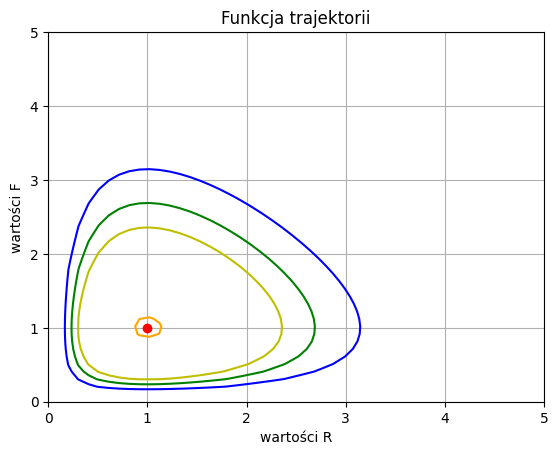

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation
def equation(x,y,a,b,c,d,C):
    return a*b*x + a*y - d*np.log(x) -c* np.log(y) - C

a=1
b=1
c=1
d=1
C_1 = 2.7
C_2 = 2.5
C_3 = 3
C_4 = 2.01
crit_point = (d/a*b,c/a)
x_values = np.linspace(0, 5)
y_values = np.linspace(0, 5)

X, Y = np.meshgrid(x_values, y_values)

T_1 = equation(X, Y,a,b,c,d,C_1)
T_2 = equation(X, Y,a,b,c,d,C_2)
T_3 = equation(X, Y,a,b,c,d,C_3)
T_4 = equation(X, Y,a,b,c,d,C_4)

plt.plot(crit_point[0],crit_point[1],'ro')
plt.contour(X, Y, T_1, levels=[0], colors='g')
plt.contour(X, Y, T_2, levels=[0], colors='y')
plt.contour(X, Y, T_3, levels=[0],colors='b')
plt.contour(X, Y, T_4, levels=[0], colors='orange')
plt.plot()

plt.xlabel('wartości R')
plt.ylabel('wartości F')
plt.title('Funkcja trajektorii')
plt.grid(True)

plt.show()

Jak widać na wykresie trajektorie dla rosnących wartości $C$ podanych w kodzie zwiększają coraz bardziej swoją amplitudę (co widać w zmieniającej się wielkości), okrążając punkt krytyczny. Za współczynniki $a$,$b$,$c$,$d$ przyjęliśmy w tym przypadku jedynki, aby funkcja nie była zbyt skomplikowana. Poprawność jej sprawdzimy później przy prezentacji działania modelu. 
* Można modyfikować wartości współczynników oraz stałe trajektorii $C$, jednak trzeba pamiętać, że dla różnych współczynników prawidłowe stałe trajektorii (czyli takie, które pojawią się na wykresie) trzeba wyznaczyć eksperymentalnie (tzn. metodą prób i błędów), a także zmienić wtedy skalę wykresu *x_values* i *y_values*.


Dla potwierdzenia poprawności założenia, że wszystkie rozwiązania krążą wokół punktu stacjonarnego $\biggl(\cfrac{d}{ab},\cfrac{c}{a}\biggr)$, wykażemy też analitycznie, że każde rozwiązanie ma wartość średnią w owym punkcie krytycznym. Jeśli przyjmiemy za $T$ okres rozwiązania pewnego punktu ($R$,$F$) oraz zapiszemy pierwsze równanie z $(1)$ jako 
\begin{equation*}
    \frac{\mathbb{d}R}{R} = c - aF
\end{equation*}
Całkując obustronnie po „$T$" i na obszarze $(0$-$T)$ otrzymamy
\begin{equation*}
    \ln\left({\frac{R(T)}{R_0}}\right) = cT - a\int^T_0{F(p)dp},
\end{equation*}
Pamiętając jednak, że rozwiązanie jest cykliczne $($ tzn. punkt $R(T) = R(0)$, więc $\ln\left({\frac{R_0}{R_0}}\right)=0)$ oraz korzystając z twierdzenia Lagrange'a o wartości średniej na przedziale $(0$-$T)$ możemy zapisać wartość średnią dla funkcji $F$ pod znakiem całki
\begin{equation*}
    F_{śr}= \frac{1}{T-0}\int^T_0{F(p)dp}=\frac{1}{T}\frac{cT}{a}=\frac{c}{a},
\end{equation*}

Przechodząc analogicznie dla równania drugiego z $(1)$ dostajemy, że $R_{śr}=\cfrac{d}{ab}$, a obie te współrzędne łącząc dostajemy punkt $\biggl(\cfrac{d}{ab},\cfrac{c}{a}\biggr)$, czyli nasz punkt krytyczny, co chcieliśmy udowdonić.

***

# Model w Pythonie - część praktyczna <a id="3"></a>

### Rozwiązanie numeryczne za pomocą metody Eulera <a id="3_1"></a>

Aby rozwiązać nasze równanie numerycznie, zmieńmy nieco sposób, w jaki na nie patrzymy. 

\begin{align*}
    \frac{\mathbb{d}x}{\mathbb{d}t}&=a \,x-b \,xy &&&&& \frac{\Delta x}{\Delta t}&=a \,x-b \,xy \\[2 em]
     \frac{\mathbb{d}y}{\mathbb{d}t} &=d \,xy-c\,y &&&&& \frac{\Delta y}{\Delta t}&=d \,xy-c\,y
\end{align*}

Stosując taki zapis chcemy podkreślić, że aby rozwiązać układ numerycznie, będziemy wielokrotnie wyliczać jego wartości dla dyskretnych czasów.

Następnie wymnażamy obie strony równania przez $\Delta{t}$,

\begin{equation*}
    \begin{split}
        \Delta x&=(a \,x-b \,xy) \Delta t \\[4pt]
        \Delta y&=(d \,xy-c\,y) \Delta t 
    \end{split}
\end{equation*}

co pozwoli nam przystąpić do implementacji funkcji w Pythonie.

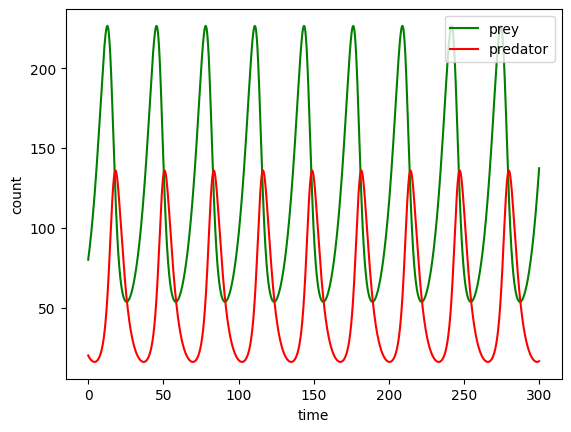

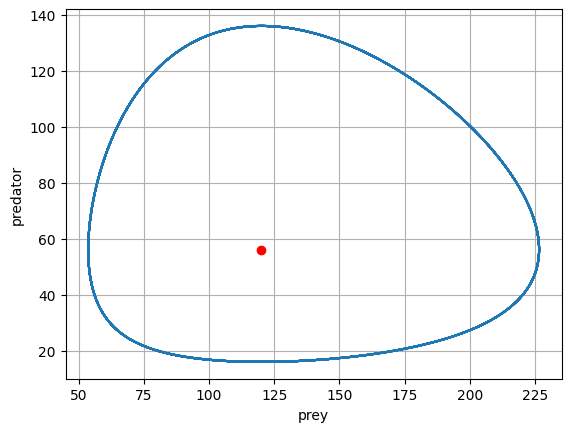

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def predator_prey_euler(x_0, y_0, a, b, d, c, t_end, delta_t):
    x = [x_0]
    y = [y_0]
    t = np.arange(0, t_end+delta_t, delta_t)

    for _ in range(len(t)-1):
        next_x = x[-1] + (a*x[-1] - b*x[-1]*y[-1])*delta_t #aktualne x + delta x
        x.append(next_x)

        next_y = y[-1] + (d*x[-1]*y[-1] - c*y[-1])*delta_t #aktualne y + delta y
        y.append(next_y)
    
    return x, y, t, max(x), max(y)

a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01
x0 = 80
y0 = 20

x, y, t, max_x, max_y = predator_prey_euler(x0, y0, a, b, d, c, 300, h)

#rysowanie wykresów
f, ax = plt.subplots(1)

fig1 = ax.plot(t, x, color="g", label="prey")
fig2 = ax.plot(t, y, color="r", label="predator")

ax.set_ylabel("count")
ax.set_xlabel("time")
ax.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

plt.plot(x, y)
plt.plot(c/d,a/b,"ro")
plt.xlabel("prey")
plt.ylabel("predator")
plt.grid()
plt.show()
        


Możemy teraz porównać wynik drugiej symulacji z analogicznym rozwiązaniem metodą z logarytmami podawaną w poprzednim rozdziale. Podstawiając odpowiednie współczynniki z poprzedniej symulacji ostrzymujemy 

/var/folders/hn/gx3zxz4516s7kxrlbtw0ygmh0000gp/T/ipykernel_4166/1123575545.py:7: RuntimeWarning: divide by zero encountered in log
  return d*x + b*y - c*np.log(x) -a* np.log(y) - C


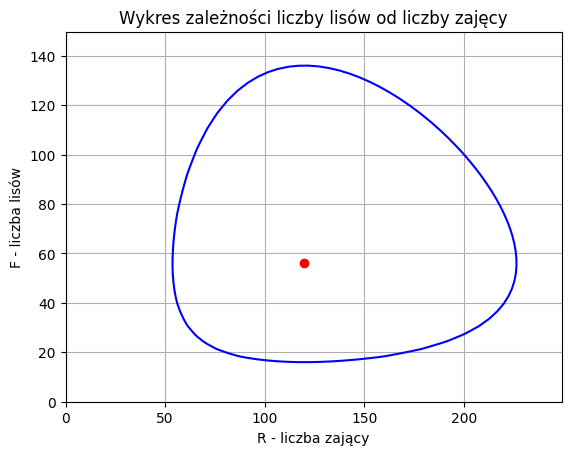

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation
def equation(x,y,a,b,c,d,x0,y0):
    C = d*x0 + b*y0 - c*np.log(x0) -a* np.log(y0)
    return d*x + b*y - c*np.log(x) -a* np.log(y) - C

crit_point = (c/d,a/b)
x_values = np.linspace(0, max_x*1.1)
y_values = np.linspace(0, max_y*1.1)

X, Y = np.meshgrid(x_values, y_values)

T_1 = equation(X, Y,a,b,c,d,x0,y0)

plt.contour(X, Y, T_1, levels=[0], colors='b')
plt.plot()
plt.plot(crit_point[0],crit_point[1],'ro')
plt.xlabel('R - liczba zający')
plt.ylabel('F - liczba lisów')
plt.title('Wykres zależności liczby lisów od liczby zajęcy')
plt.grid(True)
plt.show()

Wykres zachowuje się tak samo, jak ten dołączony do rozwiązania metodą Eulera (jedynie specyficzne skalowanie przeszkadza w odpowiedniej interpretacji), a więc funkcja wyliczająca trajektorię rozwiązań dla punktów początkowych $x_0$ i $y_0$ oraz stałej $C$ ustalonej dla tych punktów jest poprawna.

### Rozwiązanie numeryczne za pomocą metody Rungego-Kutty (4-tego stopnia)

Metoda Eulera jest prosta do zaimplementowania, jednak oferuje ona dosyć niską dokładność. Z tego powodu przystąpmy do numeryczengo rozwiązania równania metodą Rungego-Kutty, która pozwali nam dużo lepiej przybliżyć wynik.

Metoda ta opiera się na przybliżaniu wyniku za pomocą obliczania wartości funkcji w kolejnych punktach posuwając się o krok $h$, gdzie używana jest średnia ważona przybliżonych wartości z przedziału $(t_n, t_n + h)$.

Wzór iteracyjny na kolejny wyraz wygląda następująco
\begin{equation*}
    x_{n+1} = x_n + (k_1 + 2k_2 + 2k_3 + k_4)
\end{equation*}

gdzie

\begin{equation*}
    \begin{split}
        k_1 &= f(t_n, x_n) \\
        k_2 &= f(t_n + \frac{h}{2}, x_n + \frac{k_1h}{2}) \\
        k_3 &= f(t_n + \frac{h}{2}, x_n + \frac{k_2h}{2}) \\
        k_4 &= f(t_n + h, x_n + k_3h)
    \end{split}
\end{equation*}

[50.         50.02004774 50.04019091 ... 50.53346928 50.55589919
 50.57842295]


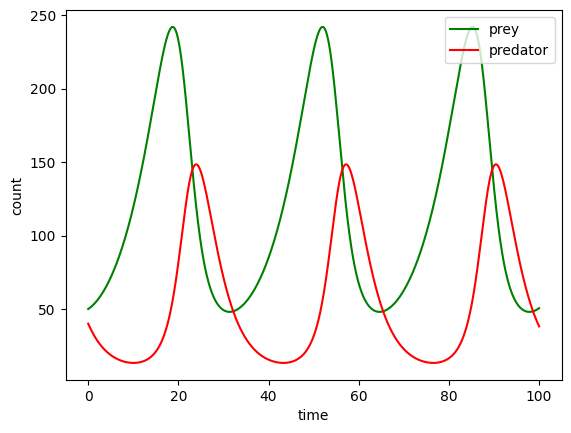

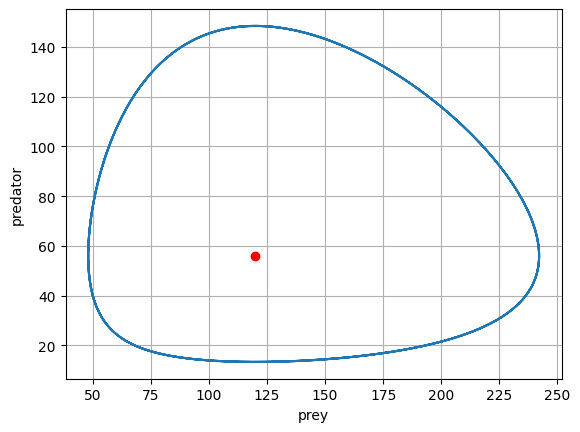

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra_fun(t, y, a, b, d, c):
    dxdt = a*y[0] - b*y[0]*y[1]
    dydt = d*y[0]*y[1] - c*y[1]
    return np.array([dxdt, dydt])

def runge_kutta(t, y, h, a ,b, d, c):
    k1 = lotka_volterra_fun(t, y, a, b, d, c)
    k2 = lotka_volterra_fun(t+h/2, y+k1*h/2, a, b, d, c)
    k3 = lotka_volterra_fun(t+h/2, y+k2*h/2, a, b, d, c)
    k4 = lotka_volterra_fun(t+h, y+k3*h, a, b, d, c)

    next_y = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    return next_y

def calculate_lotka_volterra_with_runge_kutta(initial_cons, t_end, a, b, d, c, h):
    t = np.arange(0, t_end+h, h)
    y = np.zeros((len(t), len(initial_cons)))
    y[0] = initial_cons

    for i in range(1, len(t)):
        y[i] = runge_kutta(t[i-1], y[i-1], h, a, b, d, c)

    return t, y

x_0 = 50
y_0 = 40
a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, h)

print(y[:, 0])

plt.plot(t, y[:, 0], color="g", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend(labels=["prey", "predator"], loc="upper right")
plt.show()

plt.plot(y[:, 0], y[:, 1])
plt.xlabel("prey")
plt.ylabel("predator")
plt.plot(c/d,a/b,"ro")
plt.grid()
plt.show()



## Porównanie metod Eulera i Runge-Kutty

Obie metody są do siebie bardzo zbliżone, jednakże ze względu na aż 4 kroki obliczeniowe w algorytmie Runge-Kutty metoda ta charakteryzuje się dużo większa dokładnością oraz stabilnością w porównaniu do Eulera. Jest to jednak okupione zwiększoną złożonością obliczeniową.

Poniżej znajduje się porównanie wykresów powstałych za pomocą obydwu metod, a także czasów działania programów.

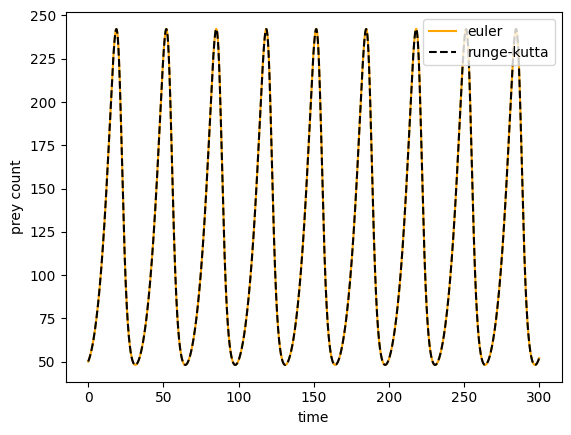

Metoda Runge-Kutta była wolniejsza od metody Eulera o 0.3179631233215332s


In [8]:
import time

x_0 = 50
y_0 = 40
a = 0.14
b = 0.0025
d = 0.0025
c = 0.3
h = 0.01
t_end = 300

es = time.time()
x_e, y_e, t_e, max_x, max_y = predator_prey_euler(x_0, y_0, a, b, d, c, t_end, h)
ee = time.time()
t, y_rk = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), t_end, a, b, d, c ,h)
rke = time.time()

plt.plot(t, x_e, color="orange", label="euler")
plt.plot(t, y_rk[:, 0], color="black", label="runge-kutta", linestyle="dashed")
plt.legend(loc="upper right")
plt.xlabel("time")
plt.ylabel("prey count")
plt.show()

euler_time = ee - es
runge_kutta_time = rke-ee

print(f"Metoda Runge-Kutta była wolniejsza od metody Eulera o {runge_kutta_time - euler_time}s")




# Modyfikacje modelu podstawowego <a id="4"></a>

Podstawowy model Lotki-Volterry jest nierealny, ponieważ nie uwzględnia on ograniczonych zasobów potrzebnych do rozwoju populacji ofiar (przy zerowej populacji drapieżników populacja ofiar będzie wykładniczo rosła w nieskończoność). Zmodyfikujmy nieco równanie, aby rozwiązać ten problem.

\begin{align*}
    \frac{\mathbb{d}x}{\mathbb{d}t} &= x(a - ex - by) \\[2 em]
    \frac{\mathbb{d}x}{\mathbb{d}t} &= -y(c - dx)
\end{align*}

gdzie

* $a$ - współczynnik rozrodczości ofiar
* $b$ - współczynnik określający jak szybko ofiary są zjadane przez drapieżników
* $c$ - współczynnik śmierci drapieżników
* $\frac{a}{e}$ - pojemność środowiska ofiar (nielażnie od drapieżników)
* $d$ - współczynnik rozdrodczości drapieżników w zależności od liczby zjadanych ofiar


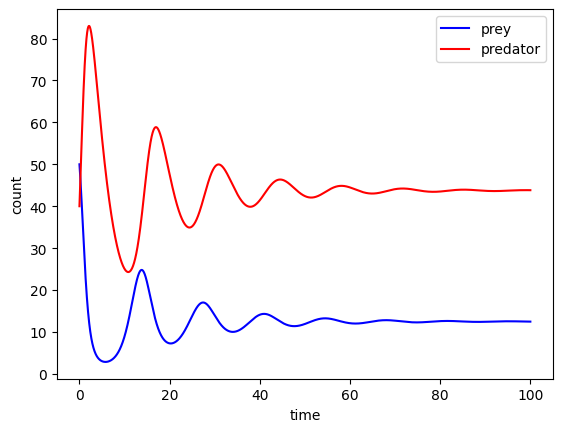

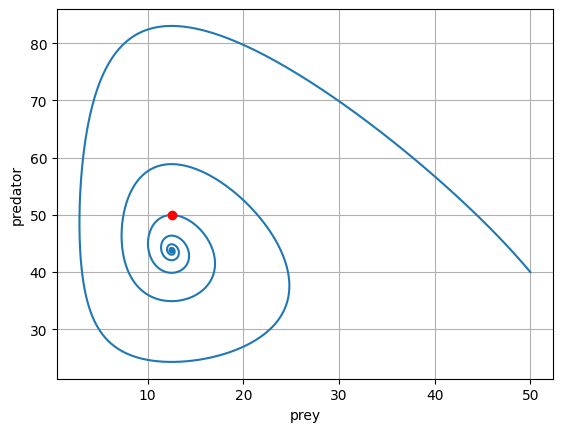

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def lotka_volterra_fun(t, y, a, b, d, c, e):
    dxdt = y[0]*(a - e*y[0] - b*y[1])
    dydt = -y[1]*(c - d*y[0])
    return np.array([dxdt, dydt])

def runge_kutta(t, y, h, a ,b, d, c, e):
    k1 = lotka_volterra_fun(t, y, a, b, d, c, e)
    k2 = lotka_volterra_fun(t+h/2, y+k1*h/2, a, b, d, c, e)
    k3 = lotka_volterra_fun(t+h/2, y+k2*h/2, a, b, d, c, e)
    k4 = lotka_volterra_fun(t+h, y+k3*h, a, b, d, c, e)

    next_y = y + (k1 + 2*k2 + 2*k3 + k4)*h/6
    return next_y

def calculate_lotka_volterra_with_runge_kutta(initial_cons, t_end, a, b, d, c, e, h):
    t = np.arange(0, t_end+h, h)
    y = np.zeros((len(t), len(initial_cons)))
    y[0] = initial_cons

    for i in range(1, len(t)):
        y[i] = runge_kutta(t[i-1], y[i-1], h, a, b, d, c, e)

    return t, y

x_0 = 50
y_0 = 40
a = 1
b = 0.02
d = 0.02
c = 0.25
e = 0.01
h = 0.01

t, y = calculate_lotka_volterra_with_runge_kutta(np.array([x_0, y_0]), 100, a, b, d, c, e, h)

plt.plot(t, y[:, 0], color="b", label="prey")
plt.plot(t, y[:, 1], color="r", label="predator")
plt.xlabel("time")
plt.ylabel("count")
plt.legend()
plt.show()

plt.plot(y[:, 0], y[:, 1])
plt.xlabel("prey")
plt.ylabel("predator")
plt.show()



# Analiza symulacji <a id="5"></a>

### Analiza podstawy

### Analiza modyfikacji

### Porównanie z modelem rozwoju agresji

<img src="newplot.png" alt="pakiety.png">

# Wyniki i wnioski <a id="6"></a>

# Zakończenie <a id="7"></a>